# Horror | EDA

**Questions:**

**Horror**
- 1. Top Horror films
- 2. Top Slasher, Paranormal, Monster, etc.
- 3. Top Horror Locations
- 4. Top Horror Franchises
- 5. Top Horror Music/Composers
- 6. Top Horror Movie Release Date (Years, Month. Quarter)
- 7. Top Horror Colorists/Editors/
- 8. Top Horror Make-Up Artists
- 9. Top Horror Costume Designers
- 10. Top Horror Gaffer
- 11. Top Horror Cinematographer
- 12. Top Horror Makers!(Studios/Production Companies)
- 13. Top Horror Actors
- 14. Top Horror Writers


All these questions can give insights to writers, directors, and producers to know who to hire based of of there needs and budget. Say I'm making a horror film and have a good amount in my budget set aside for Make-Up and Costumes (it's a zombie movie and it is vital the zombies look real and scary... it could make or break the film), having a list of known artists can be beneficial in reducing the amount of time scouting, casting, budgeting, and pre-production...

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib_venn import venn2
from scipy.stats import norm
from scipy import stats
from ast import literal_eval
from typing import Dict, List
from collections import Counter
from matplotlib.pyplot import figure
import ast
import re
import json
import nltk
import re
import csv
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings; warnings.simplefilter('ignore')

# Highest Revenue Horror Films

In [127]:
horror_df = pd.read_csv('../../data/processed/horror_df.csv')

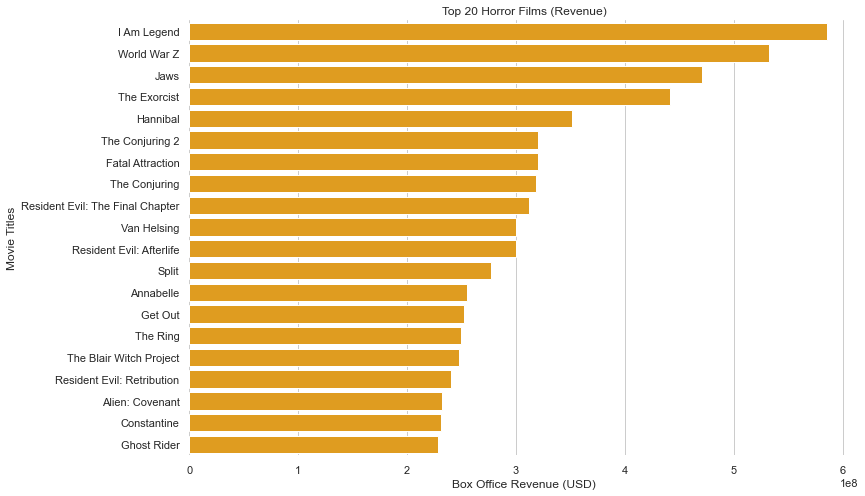

In [128]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load revenue data
horror_top20 = horror_df[['title', 'revenue']].sort_values(by = 'revenue', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x='revenue', y='title', data=horror_top20,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Box Office Revenue (USD)",
       title='Top 20 Horror Films (Revenue)')

sns.despine(left=True, bottom=True)

In [129]:
horror_tops = horror_df[['title', 'revenue']].sort_values(by = 'revenue', ascending = False)
horror_tops.shape

(602, 2)

# Top Horror Studios

In [130]:
horror_companies = pd.read_csv('../../data/processed/horror_data/horror_companies.csv')

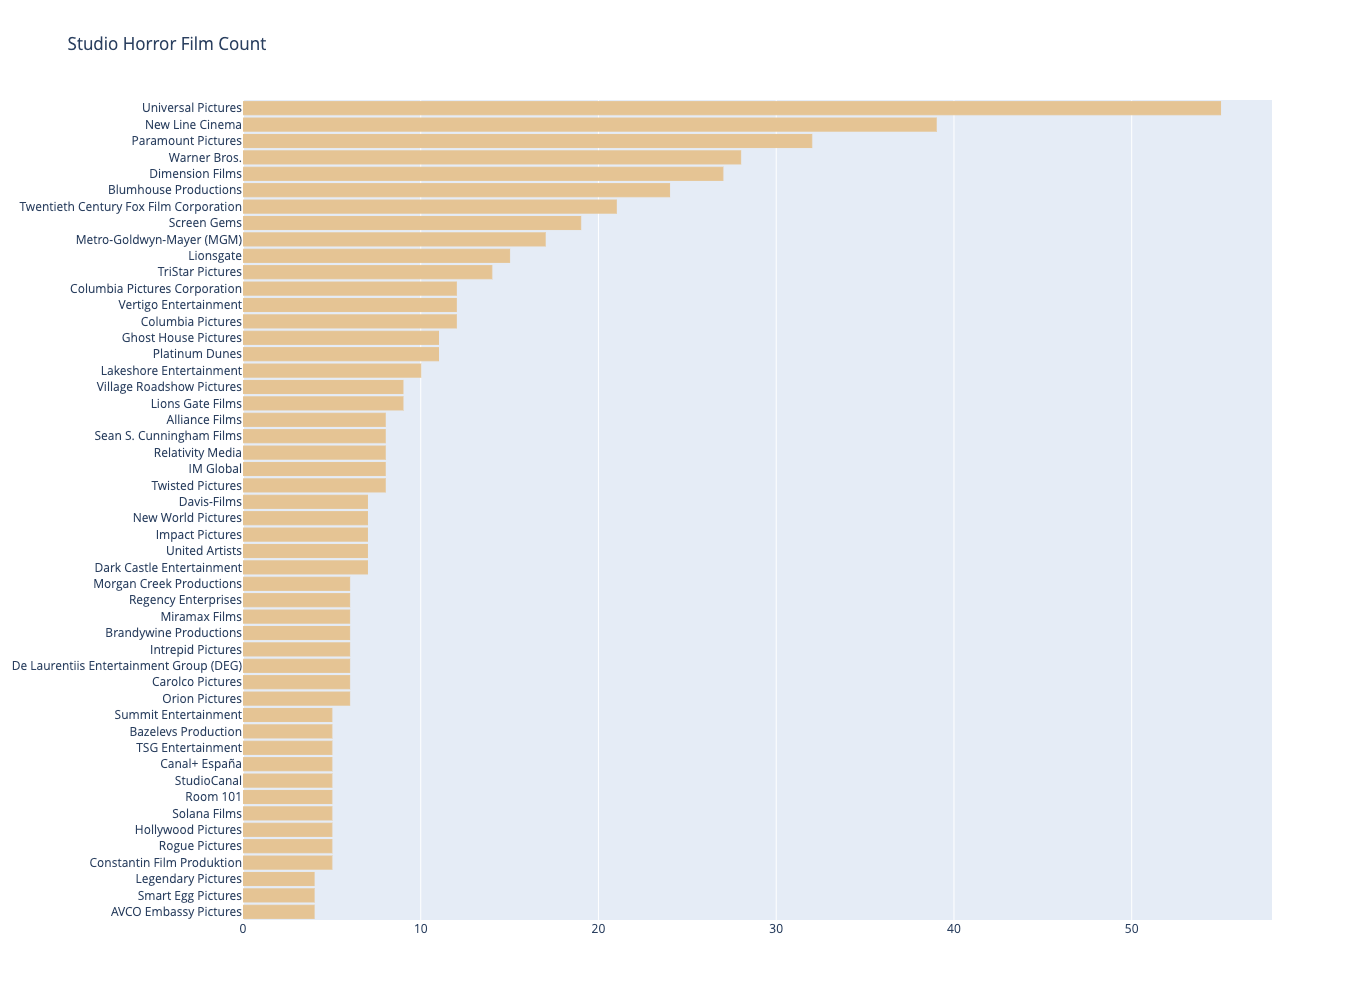

In [131]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_companies = horror_companies.groupby(['production_companies']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_companies = top_horror_companies[['production_companies','counts']].sort_values(by = 'counts', ascending = False).head(50)
studio = top_horror_companies['production_companies']
count = top_horror_companies['counts']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = studio,
    x = count,
    name = 'Studio',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Studio Horror Film Count",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="max ascending")
fig.update_yaxes(automargin=True)
fig.show()

# Top Horror Franchise Films

In [132]:
horror_franchises = pd.read_csv('../../data/processed/horror_data/horror_franchises.csv')

In [133]:
horror_franchises.head()

,id,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,...,genre_Documentary,genre_Foreign,genre_TV Movie,title,budget,revenue,release_date,belongs_to_collection,runtime,gross_profit
0,755,4,Action Crime Horror Thriller,0,0,1,1,0,0,1,...,0,0,0,From Dusk Till Dawn,19000000,25836616,1996-01-19,1,108.0,6836616
1,9102,2,Horror Science Fiction,0,0,0,0,0,0,0,...,0,0,0,Screamers,20000000,5781885,1995-09-08,1,108.0,-14218115
2,9348,3,Action Horror Science Fiction,0,0,0,1,0,0,0,...,0,0,0,Species,35000000,113374103,1995-07-07,1,108.0,78374103
3,628,2,Horror Romance,0,0,0,0,1,0,0,...,0,0,0,Interview with the Vampire,60000000,223664608,1994-11-11,1,123.0,163664608
4,11596,4,Fantasy Horror Mystery Thriller,0,0,1,0,0,0,0,...,0,0,0,New Nightmare,14000000,18090181,1994-10-13,1,112.0,4090181


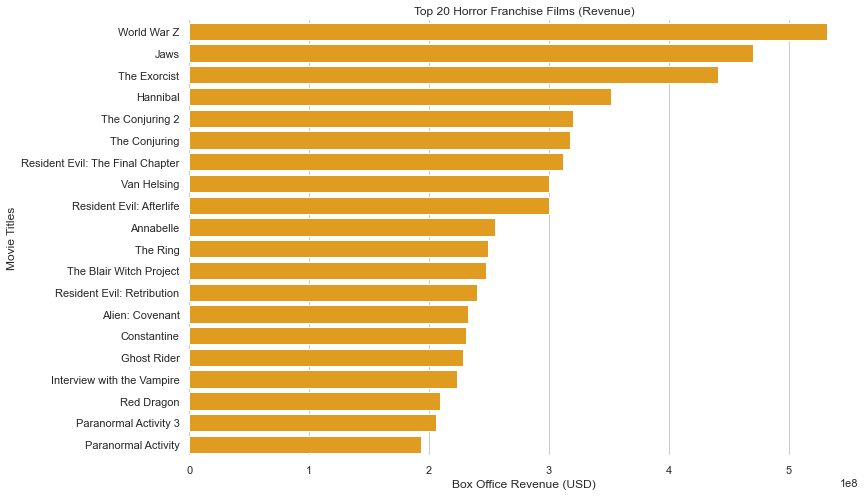

In [134]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load revenue data
top_horror_franchises = horror_franchises[['title', 'revenue']].sort_values(by = 'revenue', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x='revenue', y='title', data=top_horror_franchises,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Box Office Revenue (USD)",
       title='Top 20 Horror Franchise Films (Revenue)')

sns.despine(left=True, bottom=True)

**Take a look at what films had a `successful` or `unsuccessful` sequeal or prequel**

# Top Horror Franchises

In [135]:
horror_franchise_films = pd.read_csv('../../data/processed/horror_data/horror_franchise_films_df.csv')

In [136]:
horror_franchise_films.head()

,id,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,...,genre_Foreign,genre_TV Movie,title,budget,revenue,release_date,belongs_to_collection,runtime,gross_profit,Series
0,138843,2,Horror Thriller,0,0,1,0,0,0,0,...,0,0,The Conjuring,13000000,318000141,2013-07-18,1,112.0,305000141,The Conjuring
1,259693,1,Horror,0,0,0,0,0,0,0,...,0,0,The Conjuring 2,40000000,320170008,2016-05-13,1,134.0,280170008,The Conjuring
2,250546,1,Horror,0,0,0,0,0,0,0,...,0,0,Annabelle,6500000,255273813,2014-10-02,1,99.0,248773813,The Conjuring
3,1576,3,Action Horror Science Fiction,0,0,0,1,0,0,0,...,0,0,Resident Evil,33000000,102984862,2002-03-15,1,100.0,69984862,Resident Evil
4,1577,3,Action Horror Science Fiction,0,0,0,1,0,0,0,...,0,0,Resident Evil: Apocalypse,45000000,129394835,2004-09-10,1,94.0,84394835,Resident Evil


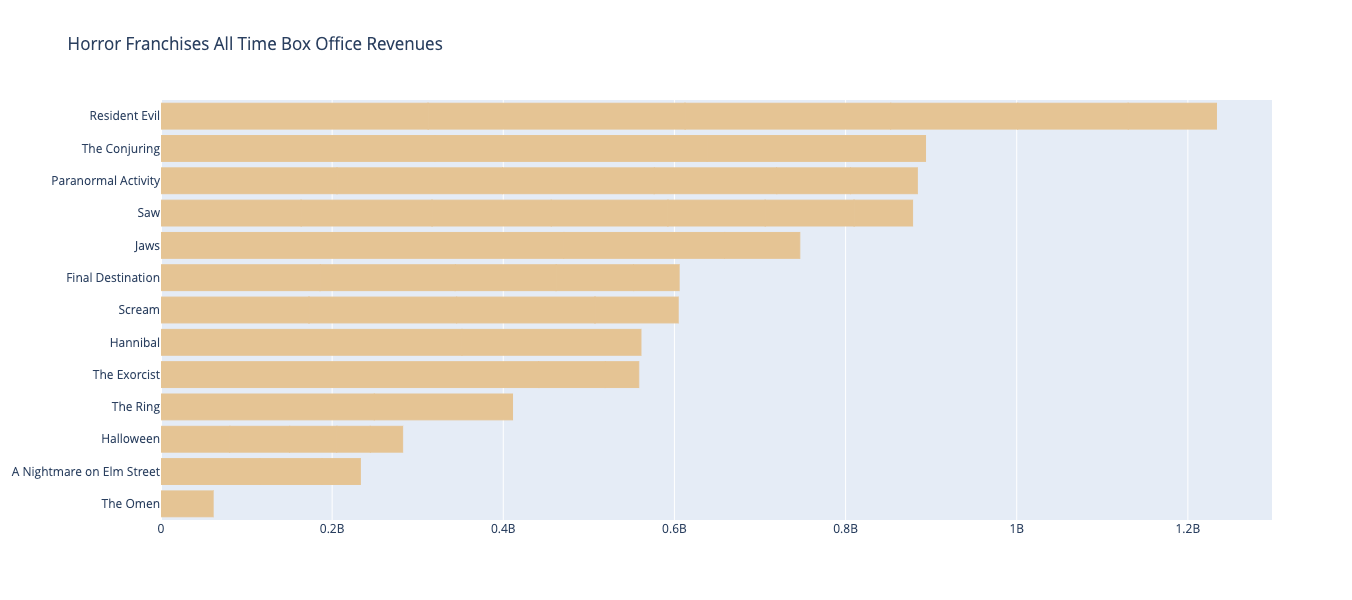

In [137]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))


# Load horror location data
horror_franchise_films = horror_franchise_films.groupby(['Series','revenue']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
horror_franchise_films = horror_franchise_films[['Series','revenue','counts']].sort_values(by = 'revenue', ascending = False).head(50)
series = horror_franchise_films['Series']
revenue = horror_franchise_films['revenue']




fig = go.Figure()

fig.add_trace(go.Bar(
    y = series,
    x = revenue,
    name = 'Franchise',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Horror Franchises All Time Box Office Revenues",
    autosize=False,
    width=1300,
    height=600,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="sum ascending")
fig.update_yaxes(automargin=True)
fig.show()

# Top Horror Director(s)

In [138]:
horror_directors = pd.read_csv('../../data/processed/horror_data/horror_directors.csv')

In [139]:
horror_directors.head()

,id,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,...,title,budget,revenue,release_date,belongs_to_collection,runtime,gross_profit,gender,job,name
0,755,4,Action Crime Horror Thriller,0,0,1,1,0,0,1,...,From Dusk Till Dawn,19000000,25836616,1996-01-19,1,108.0,6836616,2,Director,Robert Rodriguez
1,9102,2,Horror Science Fiction,0,0,0,0,0,0,0,...,Screamers,20000000,5781885,1995-09-08,1,108.0,-14218115,2,Director,Christian Duguay
2,9095,4,Drama Horror Romance Thriller,1,0,1,0,1,0,0,...,Mary Reilly,47000000,12379402,1996-02-23,0,104.0,-34620598,0,Director,Stephen Frears
3,12158,3,Comedy Horror Romance,0,1,0,0,1,0,0,...,Vampire in Brooklyn,14000000,19800000,1995-10-26,0,100.0,5800000,2,Director,Wes Craven
4,9348,3,Action Horror Science Fiction,0,0,0,1,0,0,0,...,Species,35000000,113374103,1995-07-07,1,108.0,78374103,2,Director,Roger Donaldson


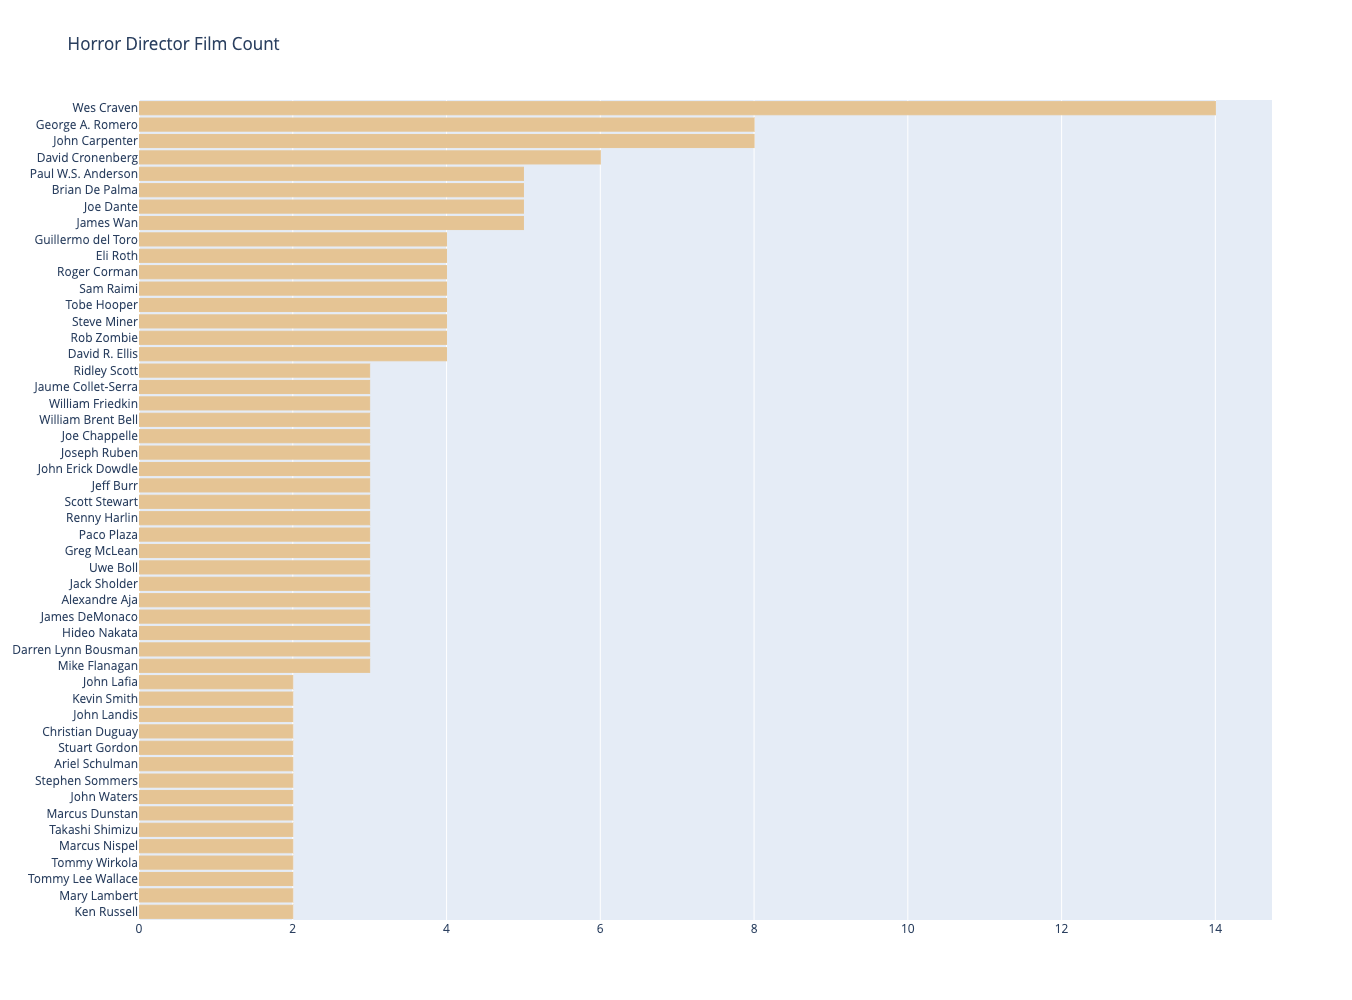

In [140]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_directors = horror_directors.groupby(['name']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_directors = top_horror_directors[['name','counts']].sort_values(by = 'counts', ascending = False).head(50)
director = top_horror_directors['name']
count = top_horror_directors['counts']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = director,
    x = count,
    name = 'Director',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Horror Director Film Count",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="max ascending")
fig.update_yaxes(automargin=True)
fig.show()

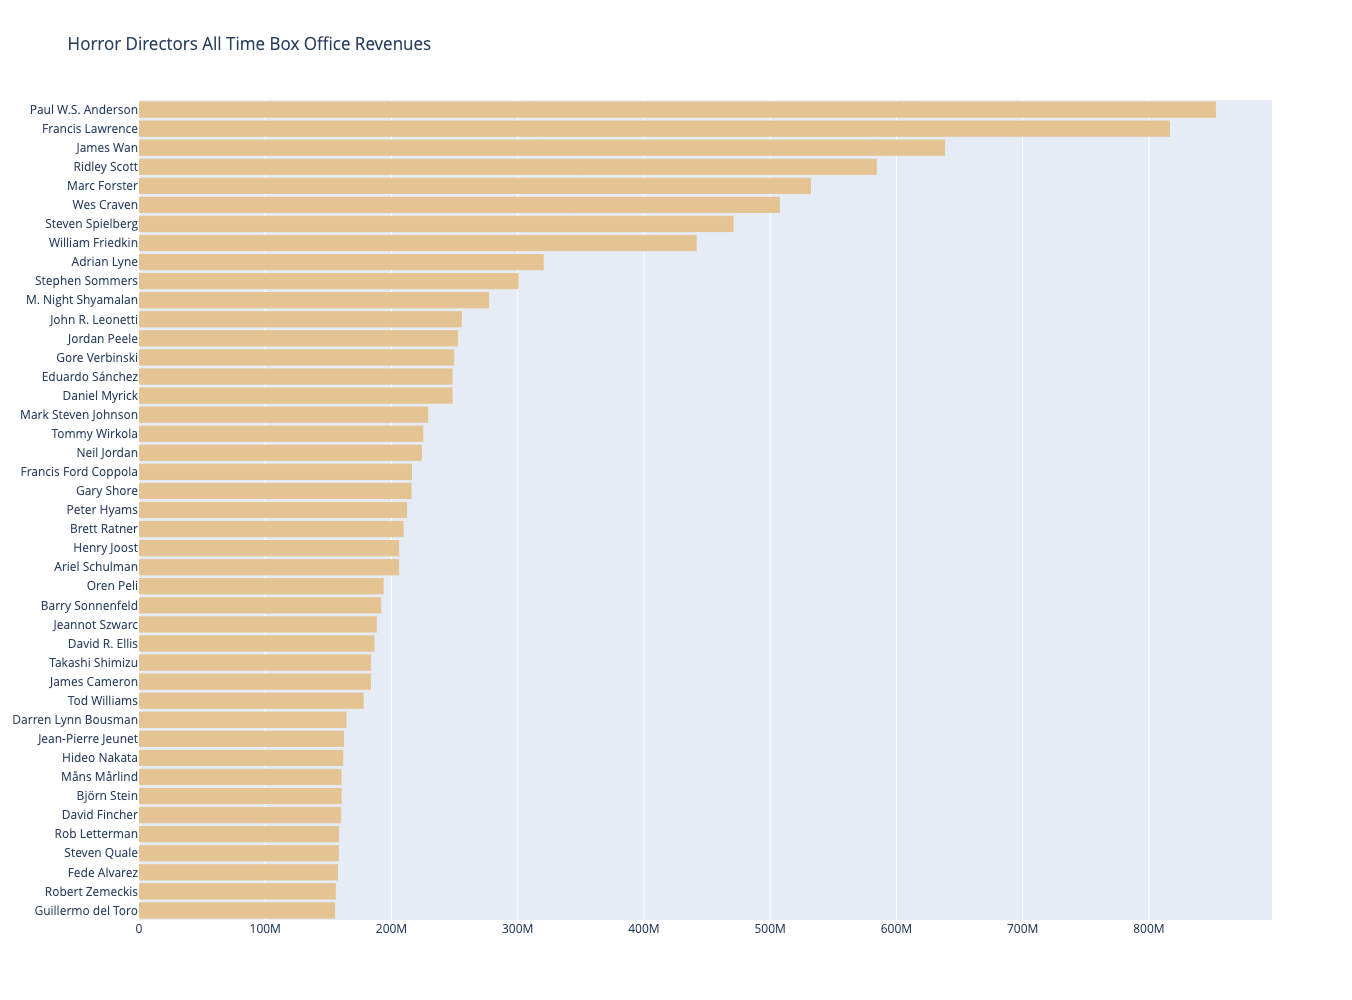

In [141]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_directors = horror_directors.groupby(['name','revenue']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_directors = top_horror_directors[['name','revenue','counts']].sort_values(by = 'revenue', ascending = False).head(50)
director = top_horror_directors['name']
revenue = top_horror_directors['revenue']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = director,
    x = revenue,
    name = 'Director',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Horror Directors All Time Box Office Revenues",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="sum ascending")
fig.update_yaxes(automargin=True)
fig.show()

# Top Horror Writers

In [142]:
horror_writers = pd.read_csv('../../data/processed/horror_data/horror_writers.csv')

In [143]:
horror_writers.head()

,id,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,...,budget,revenue,release_date,belongs_to_collection,runtime,gross_profit,department,gender,job,name
0,755,4,Action Crime Horror Thriller,0,0,1,1,0,0,1,...,19000000,25836616,1996-01-19,1,108.0,6836616,Writing,2.0,Screenplay,Quentin Tarantino
1,755,4,Action Crime Horror Thriller,0,0,1,1,0,0,1,...,19000000,25836616,1996-01-19,1,108.0,6836616,Writing,2.0,Story,Robert Kurtzman
2,9102,2,Horror Science Fiction,0,0,0,0,0,0,0,...,20000000,5781885,1995-09-08,1,108.0,-14218115,Writing,2.0,Story,Philip K. Dick
3,9102,2,Horror Science Fiction,0,0,0,0,0,0,0,...,20000000,5781885,1995-09-08,1,108.0,-14218115,Writing,2.0,Screenplay,Dan O'Bannon
4,9102,2,Horror Science Fiction,0,0,0,0,0,0,0,...,20000000,5781885,1995-09-08,1,108.0,-14218115,Writing,2.0,Screenplay,Miguel Tejada-Flores


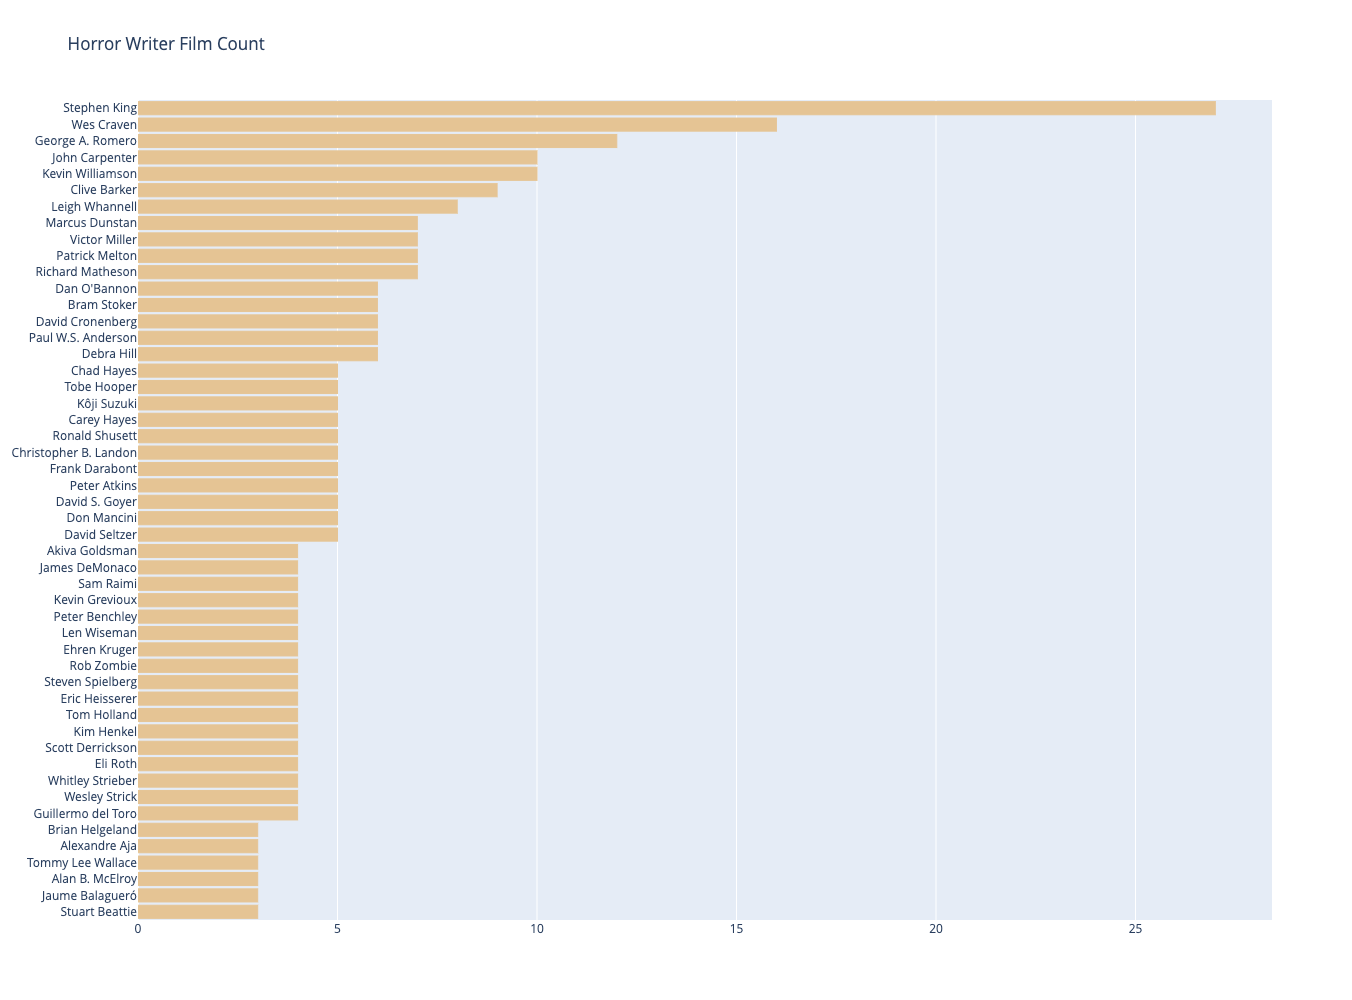

In [144]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_writers = horror_writers.groupby(['name']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_writers = top_horror_writers[['name','counts']].sort_values(by = 'counts', ascending = False).head(50)
writer = top_horror_writers['name']
count = top_horror_writers['counts']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = writer,
    x = count,
    name = 'Writer',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Horror Writer Film Count",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="max ascending")
fig.update_yaxes(automargin=True)
fig.show()

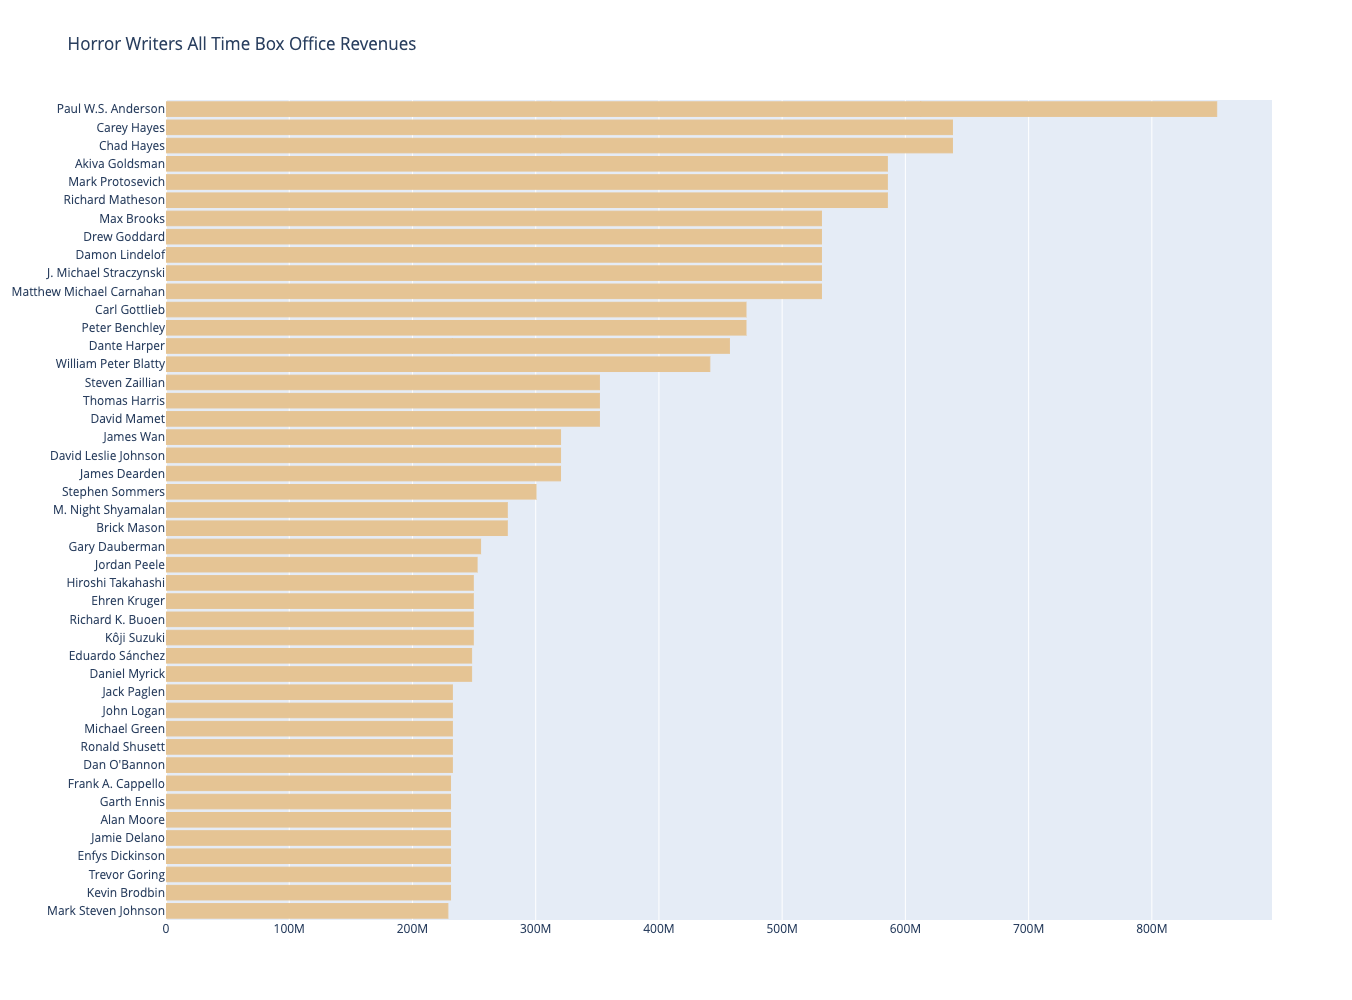

In [145]:
### import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
#fig = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_writers = horror_writers.groupby(['name','revenue']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_writers = top_horror_writers[['name','revenue','counts']].sort_values(by = 'revenue', ascending = False).head(50)
writer = top_horror_writers['name']
revenue = top_horror_writers['revenue']

fig = go.Figure()

fig.add_trace(go.Bar(
    y = writer,
    x = revenue,
    name = 'Writer',
    orientation='h',
    marker=dict(
        color='rgb(229, 196, 148)',
        line=dict(color='rgb(229, 196, 148)', width=1)
    )
)) 

fig.update_layout(
    title = "Horror Writers All Time Box Office Revenues",
    autosize=False,
    width=1300,
    height=1000,
    yaxis=dict(
        titlefont=dict(size=30),
    )
)

# Change the bar mode
fig.update_yaxes(
    type="category",
    categoryorder="sum ascending")
fig.update_yaxes(automargin=True)
fig.show()

# Top Horror Filming Locations

In [146]:
horror_locations = pd.read_csv('../../data/processed/horror_data/horror_locations.csv')

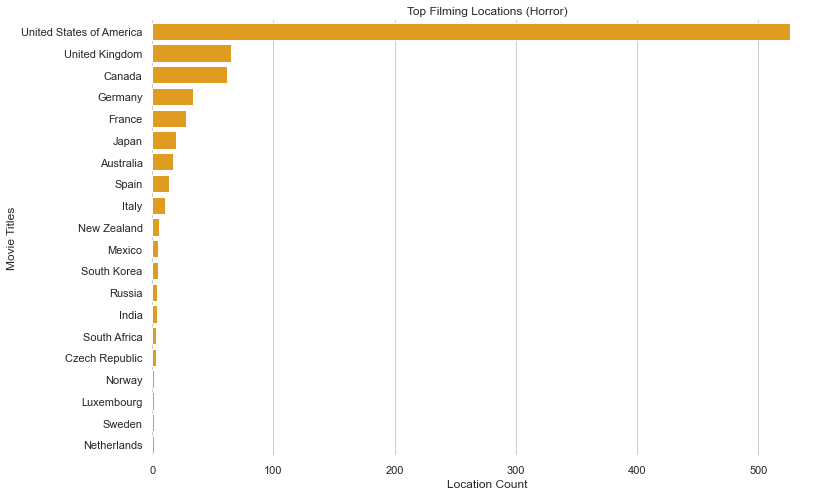

In [147]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load horror location data
top_horror_locations = horror_locations.groupby(['location']).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
top_horror_locations = top_horror_locations[['location','counts']].sort_values(by = 'counts', ascending = False).head(20)

# plot the highest revenue films
ax =sns.barplot(x = 'counts', y = 'location',data=top_horror_locations,
            label="Total", color="orange", ax=ax)

# Add x and y axis labels
ax.set(ylabel="Movie Titles",
       xlabel="Location Count",
       title='Top Filming Locations (Horror)')

sns.despine(left=True, bottom=True)